<a href="https://colab.research.google.com/github/NataliiaHromyk/HomeWork_Python_DS/blob/main/Hromyk_%22HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
medical_df = pd.read_csv('drive/MyDrive/ML_files/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

Mounted at /content/drive


In [3]:
ch = non_smoker_df['charges']
a = non_smoker_df['age']

***Методу МНК***

In [4]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [5]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
Age_with_intercept = np.c_[np.ones((a.shape[0], 1)), a]
a[:3], Age_with_intercept[:3]

(1    18
 2    28
 3    33
 Name: age, dtype: int64,
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [6]:
MNK_coefs = normal_equations(Age_with_intercept, ch)
predictions_MNK = np.dot(Age_with_intercept, MNK_coefs)

In [7]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(ch, predictions_MNK)
rmse = mean_squared_error(ch, predictions_MNK)**0.5 #, squared=False
mae = mean_absolute_error(ch, predictions_MNK)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


In [9]:
np.mean(ch), np.std(ch), np.min(ch)

(np.float64(8434.268297856204), 5990.964530287611, 1121.8739)

Наша помилка менша ніж наше відхилення

***Градієнтний спуск***

In [133]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.01, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors


In [48]:
X = a.to_frame().to_numpy()

In [152]:
m, b, errors = full_batch_gradient_descent(X, ch, lr=0.000001, epochs=10000)
predictions_fbgd = m * X[:, 0] + b
m, b

(np.float64(220.15455540263423), np.float64(0.21301135385474854))

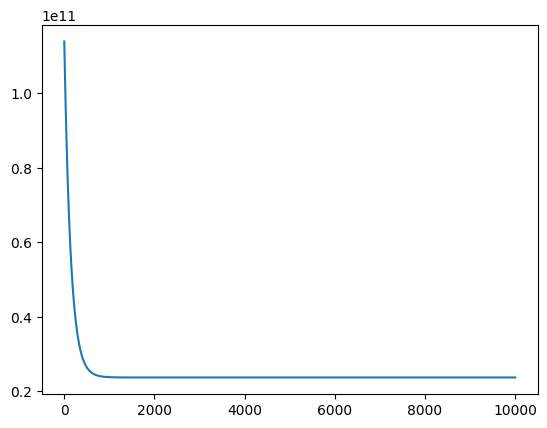

In [153]:
plt.plot(errors);

In [154]:
r2_fbgd = r2_score(ch, predictions_fbgd)
rmse_fbgd = mean_squared_error(ch, predictions_fbgd)**0.5 #, squared=False
mae_fbgd = mean_absolute_error(ch, predictions_fbgd)

print(f"R² score: {r2_fbgd:.2f}")
print(f"Root Mean Squared Error: {rmse_fbgd:.2f}")
print(f"Mean Absolute Error: {mae_fbgd:.2f}")

R² score: 0.38
Root Mean Squared Error: 4715.35
Mean Absolute Error: 2809.44



***scikit-learn.LinearRegression***





In [140]:
!pip install scikit-learn --quiet

In [141]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()


In [142]:
lin_reg.fit(X,ch)

LinearRegression()

In [143]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [144]:
predictions_sklearn = lin_reg.predict(X)
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [145]:
r2_sklearn = r2_score(ch, predictions_sklearn)
rmse_sklearn = mean_squared_error(ch, predictions_sklearn)**0.5 #, squared=False
mae_sklearn = mean_absolute_error(ch, predictions_sklearn)

print(f"R² score: {r2_sklearn:.2f}")
print(f"Root Mean Squared Error: {rmse_sklearn:.2f}")
print(f"Mean Absolute Error: {mae_sklearn:.2f}")

R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


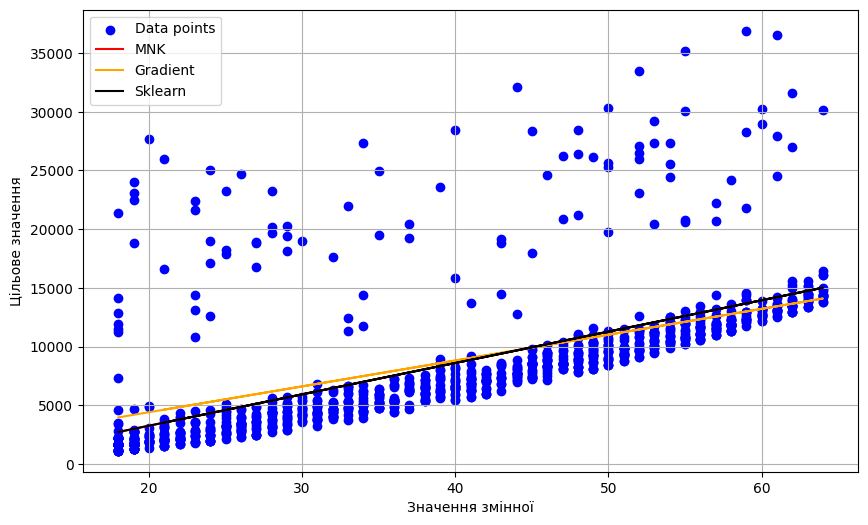

In [155]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(a, ch, color='blue', label='Data points')
plt.plot(a, predictions_MNK, color='red', label='MNK')
plt.plot(a, predictions_fbgd, color='orange', label='Gradient')
plt.plot(a, predictions_sklearn, color='black', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з стохаст. град. спуску: ', m, b)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з стохаст. град. спуску:  220.15455540263423 0.21301135385474854
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


In [157]:
print('RMSE МНК: ', rmse)
print('RMSE град. спуску: ', rmse_fbgd)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4715.3497503703065
RMSE sklearn:  4662.505766636395


In [160]:
print('R² score МНК: ', r2)
print('R² score град. спуску: ', r2_fbgd)
print('R² score sklearn: ', r2_sklearn)

R² score МНК:  0.3943171632425906
R² score град. спуску:  0.38050996403294735
R² score sklearn:  0.3943171632425906


In [158]:
np.mean(ch), np.std(ch), np.min(ch)

(np.float64(8434.268297856204), 5990.964530287611, 1121.8739)

Коефіцієнти по МНК та методом sklearn являються однаковими, а от градієнтного спуску - гіршими, що призводить до вищого показника помилки (по град спуску показник помилки є 4,175к, а по мнк та sklearn - 4,662к. І зрозуміло, що показник R^2 являється гіршим по методу град спуску

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [163]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [167]:
y_smoker = smoker_df['charges']
X_smoker = smoker_df['age'].to_frame().to_numpy()

In [168]:
lin_reg.fit(X_smoker,y_smoker)

LinearRegression()

In [169]:
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), np.float64(20294.128126915966))

In [171]:
predictions_sklearn = lin_reg.predict(X_smoker)

In [173]:
r2_sklearn = r2_score(y_smoker, predictions_sklearn)
rmse_sklearn = mean_squared_error(y_smoker, predictions_sklearn)**0.5 #, squared=False
mae_sklearn = mean_absolute_error(y_smoker, predictions_sklearn)

print(f"R² score: {r2_sklearn:.2f}")
print(f"Root Mean Squared Error: {rmse_sklearn:.2f}")
print(f"Mean Absolute Error: {mae_sklearn:.2f}")

R² score: 0.14
Root Mean Squared Error: 10711.00
Mean Absolute Error: 10097.80


In [174]:
np.mean(y_smoker), np.std(y_smoker), np.min(y_smoker)

(np.float64(32050.23183153284), 11520.466706529429, 12829.4551)

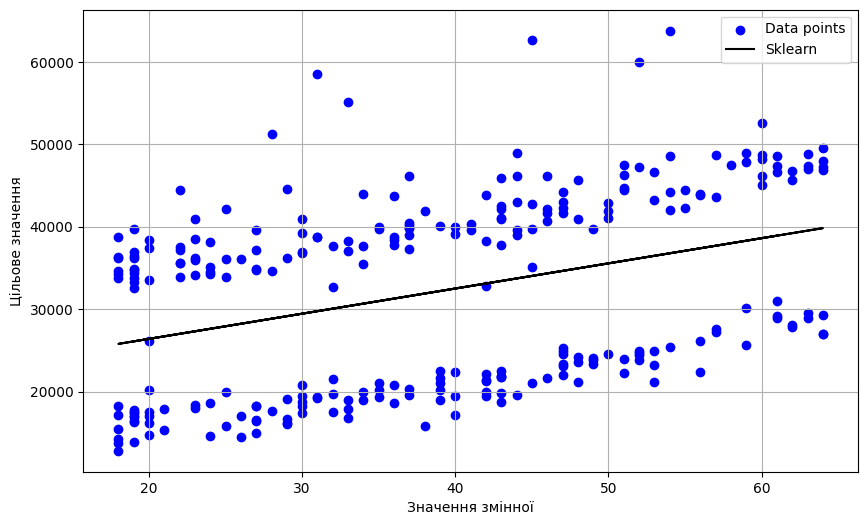

In [176]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='blue', label='Data points')
plt.plot(X_smoker, predictions_sklearn, color='black', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Дана моделя являється неякісною, показник RMSE не сильно відрізняється від стандартного відхилення, саме тому і R2 дуже низький. Це говорить про неякісні характеристики даної моделі. По графіку спостерігаємо, що дані діляться на дві групи, присутнє чітке розподілення - цілком можливо, що присутні якісь доп категоріальні зміни, котрі розбивали б показники на дві частини. Саме тому потрібно ще дослідити дані, але у такому вигляді - ні, модель не використовувала б